In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
train_path = '/content/drive/My Drive/malaraiya/Dataset/Train'
valid_path = '/content/drive/My Drive/malaraiya/Dataset/Test'

In [ ]:
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80142336/80134624 [==============================] - 1s 0us/step


In [ ]:
for layer in vgg.layers:
  layer.trainable = False
  

In [ ]:
folders = glob('/content/drive/My Drive/malaraiya/Dataset/Train/*')
  

In [ ]:
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)


In [ ]:
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)



In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/malaraiya/Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


Found 426 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/malaraiya/Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 134 images belonging to 2 classes.


In [ ]:
test_set [0]

In [ ]:
r = model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=5,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
14/14 [==============================] - 293s 21s/step - loss: 1.7434 - accuracy: 0.5070 - val_loss: 1.1616 - val_accuracy: 0.6791
Epoch 2/5
14/14 [==============================] - 7s 525ms/step - loss: 0.9782 - accuracy: 0.5915 - val_loss: 1.2608 - val_accuracy: 0.4254
Epoch 3/5
14/14 [==============================] - 8s 536ms/step - loss: 0.6058 - accuracy: 0.7277 - val_loss: 0.4978 - val_accuracy: 0.7612
Epoch 4/5
14/14 [==============================] - 7s 535ms/step - loss: 0.4131 - accuracy: 0.7793 - val_loss: 0.4464 - val_accuracy: 0.7612
Epoch 5/5
14/14 [==============================] - 7s 531ms/step - loss: 0.4013 - accuracy: 0.8028 - val_loss: 0.7753 - val_accuracy: 0.6567


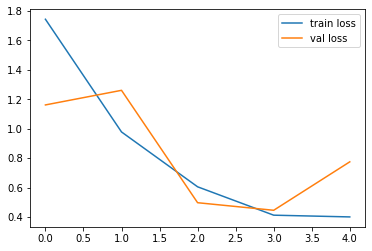

<Figure size 432x288 with 0 Axes>

In [ ]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


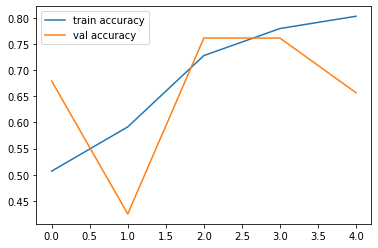

<Figure size 432x288 with 0 Axes>

In [ ]:
# accuracies
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_accuracy')

In [ ]:
import tensorflow as tf

from keras.models import load_model

model.save('model_vgg19.h5')

In [ ]:
!ls -al

total 78928
drwxr-xr-x 1 root root     4096 Aug 13 09:51 .
drwxr-xr-x 1 root root     4096 Aug 13 09:35 ..
-rw-r--r-- 1 root root     1273 Aug 13 09:51 AccVal_accuracy.png
drwxr-xr-x 1 root root     4096 Aug 10 21:25 .config
drwx------ 4 root root     4096 Aug 13 09:43 drive
-rw-r--r-- 1 root root     1273 Aug 13 09:51 LossVal_loss.png
-rw-r--r-- 1 root root 80790640 Aug 13 09:51 model_vgg19.h5
drwxr-xr-x 1 root root     4096 Jul 30 16:30 sample_data


In [ ]:
from __future__ import division, print_function
# coding=utf-8
import sys
import os
import glob
import re
import numpy as np

In [ ]:
#keras
from tensorflow.keras.applications.imagenet_utils import preprocess_input,decode_predictions
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
from flask import Flask, redirect, url_for, request, render_template
from werkzeug.utils import secure_filename


In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
# Define a flask app
app = Flask(__name__)

# Model saved with Keras model.save()
MODEL_PATH ='/content/model_vgg19.h5'


In [ ]:

# Load your trained model
model = load_model(MODEL_PATH)

In [ ]:
def model_predict(img_path, model):
    img = image.load_img(img_path, target_size=(224, 224))

    # Preprocessing the image
    x = image.img_to_array(img)
    # x = np.true_divide(x, 255)
    ## Scaling
    x=x/255
    x = np.expand_dims(x, axis=0)
   

    # Be careful how your trained model deals with the input
    # otherwise, it won't make correct prediction!
    x = preprocess_input(x)

    preds = model.predict(x)
    preds=np.argmax(preds, axis=1)
    if preds==0:
        preds="The Person is Infected With Pneumonia"
    else:
        preds="The Person is not Infected With Pneumonia"
    
    
    return preds


@app.route('/',methods=['GET'])
def index():
    # Main page
    return render_template('index.html')


@app.route('/predict', methods=['GET', 'POST'])
def upload():
    if request.method == 'POST':
        # Get the file from post request
        f = request.files['file']

        # Save the file to ./uploads
        basepath = os.path.dirname(__file__)
        file_path = os.path.join(
            basepath, 'uploads', secure_filename(f.filename))
        f.save(file_path)
       
        # Make prediction
        preds = model_predict(file_path, model)
        result=preds
        return result
    return None


if __name__ == '__main__':
    app.run(debug=True)

AssertionError: ignored

In [ ]:
@app.route('/upload', methods=['POST','GET'])
def upload_file():

    if request.method == 'GET':
        return render_template('index.html')
    else:
        try:
            file = request.files['image']
            full_name = os.path.join(UPLOAD_FOLDER, file.filename)
            file.save(full_name)

            indices = {0: 'PARASITIC', 1: 'Uninfected', 2: 'Invasive carcinomar', 3: 'Normal'}
            result = api(full_name)
            print(result)

            predicted_class = np.asscalar(np.argmax(result, axis=1))
            accuracy = round(result[0][predicted_class] * 100, 2)
            label = indices[predicted_class]
            return render_template('predict.html', image_file_name = file.filename, label = label, accuracy = accuracy)
        except:
            flash("Please select the image first !!", "danger")      
            return redirect(url_for("Malaria"))

if __name__ == '__main__':
    app.run(debug=True)

AssertionError: ignored